In [184]:
import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

import plotly.express as px
pd.set_option("display.max_rows", None)
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [185]:
df = pd.read_csv('iris.csv')

df = df.iloc[:,1:6]

df.tail(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [186]:
string_col = df.select_dtypes(include="object").columns
df[string_col] = df[string_col].astype("string")
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           string
dtype: object

In [187]:
string_col = df.select_dtypes("string").columns.to_list()

In [188]:
num_col = df.columns.to_list()
for col in string_col:
    num_col.remove(col)
          

In [189]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [190]:
px.imshow(df.corr(), title='Correlation Matrix')

<AxesSubplot: >

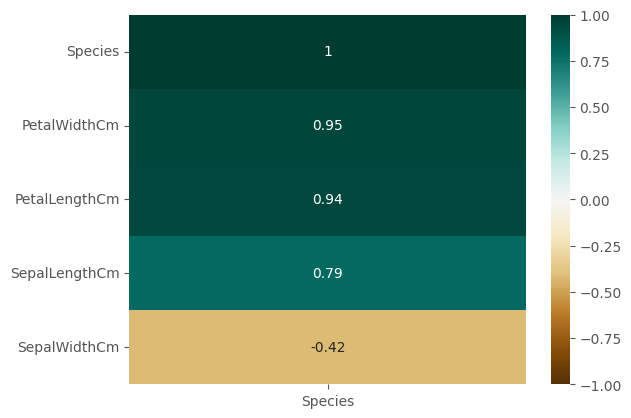

In [200]:
sns.heatmap(df_tree.corr()[['Species']].sort_values(by='Species', ascending=False), vmin=-1, vmax=1,
            annot=True, cmap='BrBG')

In [191]:
fig = px.histogram(df, x='SepalWidthCm', color='Species', hover_data=df.columns, barmode='group', 
                   title="Types of Chest Pain")
fig.show()

In [199]:
fig = px.histogram(df, x='SepalLengthCm', hover_data=df.columns, title='SepalLengthCm')
fig.show()
fig = px.histogram(df, x='SepalWidthCm', hover_data=df.columns, title='SepalWidthCm')
fig.show()
fig = px.histogram(df, x='PetalLengthCm', hover_data=df.columns, title='PetalLengthCm')
fig.show()
fig = px.histogram(df, x='PetalWidthCm', hover_data=df.columns, title='PetalWidthCm')
fig.show()

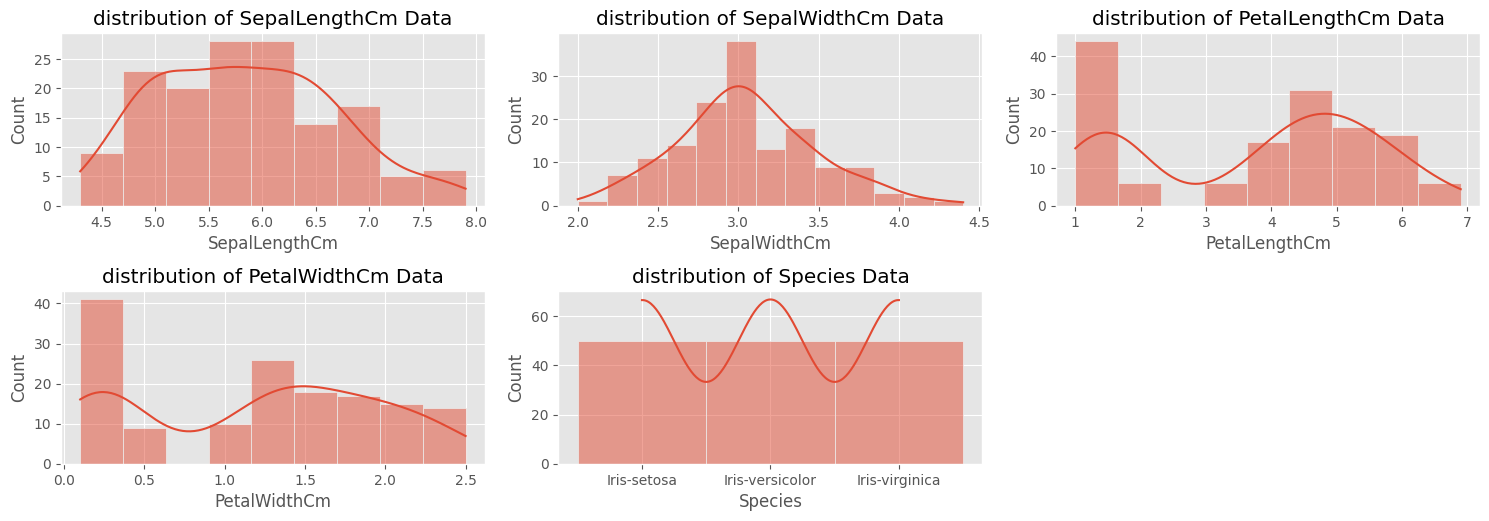

In [78]:
plt.figure(figsize=(15,10))

for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f'distribution of {col} Data')
    sns.histplot(df[col], kde=True)
    plt.tight_layout()
    plt.plot()
    

In [198]:
fig = px.box(df, y='SepalLengthCm', x='Species', title='Distribution of SepalLengthCm')
fig.show()
fig = px.box(df, y='SepalWidthCm', x='Species', title='Distribution of SepalWidthCm')
fig.show()
fig = px.box(df, y='PetalLengthCm', x='Species', title='Distribution of PetalLengthCm')
fig.show()
fig = px.box(df, y='PetalWidthCm', x='Species', title='Distribution of PetalWidthCm')
fig.show()

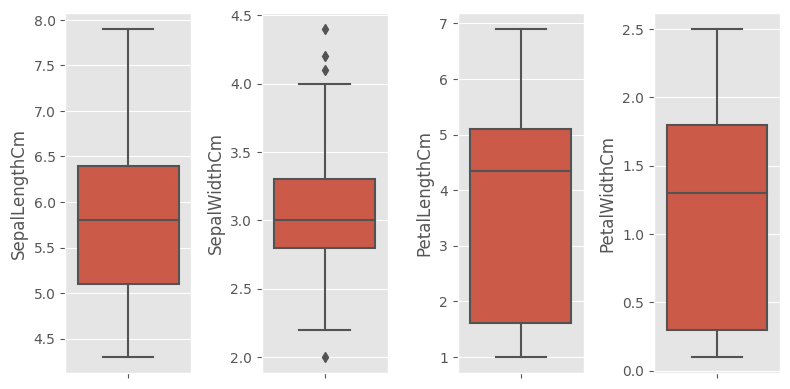

In [108]:
numeric_df = df.select_dtypes(exclude=['object'])
fig, axes = plt.subplots(1, 4,figsize=(8,4))
for i, ax in enumerate(axes.flatten()):
    sns.boxplot(y= numeric_df.iloc[:, i],  orient='v' , ax=ax)
fig.tight_layout()

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    string 
dtypes: float64(4), string(1)
memory usage: 6.0 KB


In [84]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

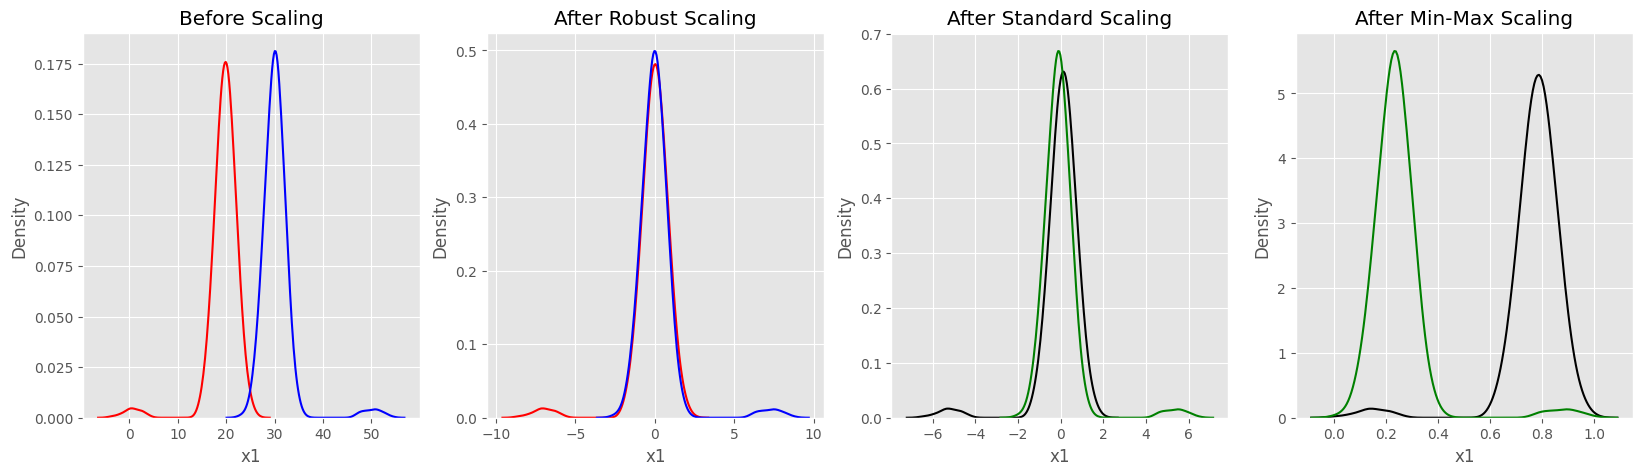

In [85]:
# Extra: Just an example to see how scaling is in general
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})
np.random.normal
 
scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns =['x1', 'x2'])
 
scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns =['x1', 'x2'])
 
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns =['x1', 'x2'])
 
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')
 
sns.kdeplot(x['x1'], ax = ax1, color ='r')
sns.kdeplot(x['x2'], ax = ax1, color ='b')
ax2.set_title('After Robust Scaling')
 
sns.kdeplot(robust_df['x1'], ax = ax2, color ='red')
sns.kdeplot(robust_df['x2'], ax = ax2, color ='blue')
ax3.set_title('After Standard Scaling')
 
sns.kdeplot(standard_df['x1'], ax = ax3, color ='black')
sns.kdeplot(standard_df['x2'], ax = ax3, color ='g')
ax4.set_title('After Min-Max Scaling')
 
sns.kdeplot(minmax_df['x1'], ax = ax4, color ='black')
sns.kdeplot(minmax_df['x2'], ax = ax4, color ='g')
plt.show()

In [161]:
df[string_col].head()
for col in string_col:
    print(f'the distribution of categorical values in {col} is: ')
    print(df[col].value_counts())
    

the distribution of categorical values in Species is: 
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: Int64


In [162]:
df_tree = df.apply(LabelEncoder().fit_transform)

df_tree.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,8,14,4,1,0
1,6,9,4,1,0
2,4,11,3,1,0
3,3,10,5,1,0
4,7,15,4,1,0
5,11,18,7,3,0
6,3,13,4,2,0
7,7,13,5,1,0
8,1,8,4,1,0
9,6,10,5,0,0


In [163]:
df_tree2 = pd.get_dummies(df, columns=string_col, drop_first=True)
df_tree2.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-versicolor,Species_Iris-virginica
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [164]:
target = 'Species'
y = df_tree[target].values
# df_tree.drop('SepalWidthCm', axis=1, inplace=True)
feature_col = df_tree.columns.to_list()
feature_col.remove(target)

df_tree.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,8,14,4,1,0
1,6,9,4,1,0
2,4,11,3,1,0
3,3,10,5,1,0
4,7,15,4,1,0


In [172]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
from sklearn.preprocessing import MinMaxScaler

acc_log = []
kf = model_selection.StratifiedKFold(n_splits=5)

for fold, (t,v) in enumerate(kf.split(X=df_tree, y=y)):

    x_train = df_tree.loc[t,feature_col]
    y_train = df_tree.loc[t, target]
    
    x_valid = df_tree.loc[v,feature_col]
    y_valid = df_tree.loc[v, target]
    
    my_scaler = MinMaxScaler()
    clf = LogisticRegression()
    
    x_train = my_scaler.fit_transform(x_train)
    x_valid = my_scaler.transform(x_valid)
    
    clf.fit(x_train, y_train)
    y_prediction = clf.predict(x_valid)
    
    print(f'the fold is {fold}:')
    print(classification_report(y_valid, y_prediction))
    auc = accuracy_score(y_valid, y_prediction)
    acc_log.append(auc)
    print(f'the accuracy for fold {fold+1} is:{auc}')



the fold is 0:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.70      0.78        10
           2       0.75      0.90      0.82        10

    accuracy                           0.87        30
   macro avg       0.88      0.87      0.87        30
weighted avg       0.88      0.87      0.87        30

the accuracy for fold 1 is:0.8666666666666667
the fold is 1:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

the accuracy for fold 2 is:0.9666666666666667
the fold is 2:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   

In [178]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
from sklearn.preprocessing import MinMaxScaler

acc_knn = []
kf = model_selection.StratifiedKFold(n_splits=5)

for fold, (t,v) in enumerate(kf.split(X=df_tree2, y=y)):
    x_train = df_tree.loc[t,feature_col]
    y_train = df_tree.loc[t, target]

    x_valid = df_tree.loc[v,feature_col]
    y_valid = df_tree.loc[v, target]

    my_scaler = MinMaxScaler()
    clf = KNeighborsClassifier()

    x_train = my_scaler.fit_transform(x_train)
    x_valid = my_scaler.transform(x_valid)

    clf.fit(x_train, y_train)
    y_prediction = clf.predict(x_valid)

    print(f'the fold is {fold}:')
    print(classification_report(y_valid, y_prediction))
    auc = accuracy_score(y_valid, y_prediction)
    acc_knn.append(auc)
    print(f'the accuracy for fold {fold+1} is:{auc}')



the fold is 0:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

the accuracy for fold 1 is:0.9666666666666667
the fold is 1:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

the accuracy for fold 2 is:0.9666666666666667
the fold is 2:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   

In [176]:
# Using Linear Kernel
from sklearn.svm import SVC
acc_svm=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_tree2,y=y)):

    X_train=df_tree.loc[trn_,feature_col]
    y_train=df_tree.loc[trn_,target]

    X_valid=df_tree.loc[val_,feature_col]
    y_valid=df_tree.loc[val_,target]

    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)

    clf=SVC(kernel="linear")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=accuracy_score(y_valid,y_pred)
    acc_svm.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")

    pass

The fold is : 0 : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

The accuracy for 1 : 0.9666666666666667
The fold is : 1 : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

The accuracy for 2 : 1.0
The fold is : 2 : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
       

In [193]:
## Using Sigmoid Kernel
from sklearn.svm import SVC
acc_svm_sig=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_tree, y=y)):
    
    X_train=df_tree.loc[trn_,feature_col]
    y_train=df_tree.loc[trn_,target]
    
    X_valid=df_tree.loc[val_,feature_col]
    y_valid=df_tree.loc[val_,target]
    
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    clf=SVC(kernel="sigmoid")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=accuracy_score(y_valid,y_pred)
    acc_svm_sig.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")
    
    pass

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.27      0.40      0.32        10
           1       0.33      0.10      0.15        10
           2       0.08      0.10      0.09        10

    accuracy                           0.20        30
   macro avg       0.23      0.20      0.19        30
weighted avg       0.23      0.20      0.19        30

The accuracy for 1 : 0.2
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.56      0.90      0.69        10
           1       0.20      0.10      0.13        10
           2       0.00      0.00      0.00        10

    accuracy                           0.33        30
   macro avg       0.25      0.33      0.28        30
weighted avg       0.25      0.33      0.28        30

The accuracy for 2 : 0.3333333333333333
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.23      0.30      0.26        10
       

In [94]:
fig = px.scatter_3d(df_tree, x = 'SepalWidthCm', 
                    y = 'PetalLengthCm', 
                    z = 'PetalWidthCm', 
                    color = 'Species') 
  
fig.show()

In [211]:
from sklearn.tree import DecisionTreeRegressor

acc_knn = []
kf = model_selection.StratifiedKFold(n_splits=5)

for fold, (t,v) in enumerate(kf.split(X=df_tree2, y=y)):
    x_train = df_tree.loc[t,feature_col]
    y_train = df_tree.loc[t, target]

    x_valid = df_tree.loc[v,feature_col]
    y_valid = df_tree.loc[v, target]

    my_scaler = MinMaxScaler()
    clf = DecisionTreeRegressor()

    x_train = my_scaler.fit_transform(x_train)
    x_valid = my_scaler.transform(x_valid)

    clf.fit(x_train, y_train)
    y_prediction = clf.predict(x_valid)

#     print(f'the fold is {fold}:')
#     print(classification_report(y_valid, y_prediction))
    auc = accuracy_score(y_valid, y_prediction)
    acc_knn.append(auc)
    print(f'the accuracy for fold {fold+1} is:{auc}')


the accuracy for fold 1 is:0.9666666666666667
the accuracy for fold 2 is:0.9666666666666667
the accuracy for fold 3 is:0.9
the accuracy for fold 4 is:0.9666666666666667
the accuracy for fold 5 is:0.9666666666666667


Feature: 0, Score: 0.01667
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.78038
Feature: 3, Score: 0.20295


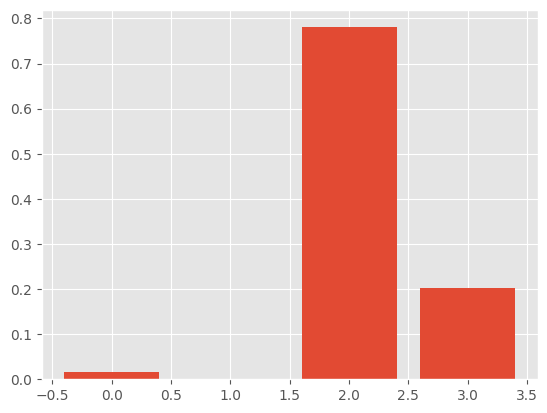

In [212]:
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()